# Causal impact analysis 

In [7]:
import pandas as pd
from causalimpact import CausalImpact
import pickle

In [9]:
with open('step_times.pkl', 'rb') as handle:
    times = pickle.load(handle)

In [5]:
df = pd.read_pickle('despiked.pkl')

In [6]:
df.head()

,H2O,Carbon dioxide CO2,Ammonia NH3,2-Amino-2-methylpropanol C4H11NO,Piperazine C4H10N2,Oxygen,PI-2,TI-2,FI-2,PI-3,...,TI-16,FI-151,TI-151,TI-152,TI-212,FI-241,TI-241,TI-242,valve-position-12,TI-1213
2020-01-21 00:00:15,1.682807,0.235364,2.560828,-21.125973,-7.650366,1.349571,-0.000496,-1.224319,9.083791,-0.000375,...,-1.216742,446.723790,-0.035674,-0.690244,-1.071597,108.890284,-0.003619,-2.307430,-0.034115,-1.791916
2020-01-21 00:01:15,1.680716,0.228377,2.561794,-20.667320,-7.422310,1.352443,-0.000412,-1.244588,7.087570,-0.000450,...,-1.201464,451.628894,-0.070300,-0.692918,-1.072954,109.483885,-0.007945,-2.329376,-0.034111,-1.774212
2020-01-21 00:02:15,1.678500,0.220972,2.562818,-20.181239,-7.180616,1.355487,-0.000448,-1.241022,7.525162,-0.000401,...,-1.213333,457.875492,-0.091090,-0.691844,-1.072889,111.261600,0.004397,-2.345620,-0.034107,-1.780701
2020-01-21 00:03:15,1.676162,0.213157,2.563898,-19.668273,-6.925554,1.358699,-0.000469,-1.240277,6.348979,-0.000338,...,-1.212363,460.155263,-0.091981,-0.690089,-1.065032,110.236362,-0.002993,-2.321836,-0.034103,-1.774095
2020-01-21 00:04:15,1.673704,0.204944,2.565034,-19.129162,-6.657492,1.362075,-0.000440,-1.246035,3.789692,-0.000309,...,-1.214739,457.705561,-0.100521,-0.684093,-1.055938,110.071760,-0.005436,-2.307093,-0.034099,-1.796970


In [11]:
times

[{'start': datetime.datetime(2020, 1, 21, 11, 40),
  'end': datetime.datetime(2020, 1, 21, 16, 50)},
 {'start': datetime.datetime(2020, 1, 24, 12, 40),
  'end': datetime.datetime(2020, 1, 24, 19, 40)},
 {'start': datetime.datetime(2020, 2, 1, 9, 10),
  'end': datetime.datetime(2020, 2, 1, 16, 20)},
 {'start': datetime.datetime(2020, 1, 22, 9, 0),
  'end': datetime.datetime(2020, 1, 22, 14, 10)},
 {'start': datetime.datetime(2020, 1, 17, 8, 55),
  'end': datetime.datetime(2020, 1, 17, 13, 55)},
 {'start': datetime.datetime(2020, 1, 20, 8, 50),
  'end': datetime.datetime(2020, 1, 20, 13, 50)},
 {'start': datetime.datetime(2020, 1, 15, 14, 10),
  'end': datetime.datetime(2020, 1, 15, 18, 30)},
 {'start': datetime.datetime(2020, 1, 16, 9, 10),
  'end': datetime.datetime(2020, 1, 16, 13, 10)},
 {'start': datetime.datetime(2020, 1, 23, 9, 10),
  'end': datetime.datetime(2020, 1, 23, 14, 20)},
 {'start': datetime.datetime(2020, 1, 24, 8, 25),
  'end': datetime.datetime(2020, 1, 24, 13, 35)}]

In [49]:
s1 =  df.index[df.index.get_loc(pd.to_datetime(times[0]['start']), method='ffill')]

In [50]:
s2 = df.index[df.index.get_loc(pd.to_datetime(times[0]['start']), method='bfill')]

In [51]:
s3 = df.index[df.index.get_loc(pd.to_datetime(times[0]['end']), method='nearest')]

In [52]:
s1

Timestamp('2020-01-21 11:39:15', freq='T')

In [53]:
s2

Timestamp('2020-01-21 11:40:15', freq='T')

In [54]:
ci = CausalImpact(df, [df.index[0], s1],
                  [s2, s3])

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


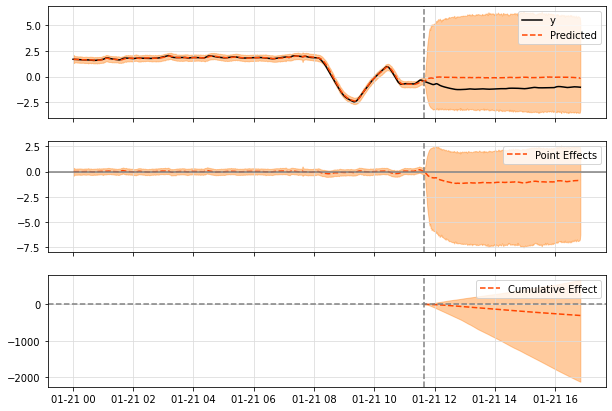

In [55]:
ci.plot()